# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city- need to request "metric" to retrieve C values.
    city_url = url + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | dryden
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | kadnikov
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | hawaiian paradise park
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | papao
Processing Record 17 of Set 1 | invercargill
Processing Record 18 of Set 1 | yemetsk
Processing Record 19 of Set 1 | sharm el-sheikh
Processing Record 20 of Set 1 | maubara
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22

City not found. Skipping...
Processing Record 39 of Set 4 | lesogorsk
Processing Record 40 of Set 4 | whitehorse
Processing Record 41 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | sidney
Processing Record 44 of Set 4 | luanda
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | labytnangi
Processing Record 47 of Set 4 | chonchi
Processing Record 48 of Set 4 | utrik
Processing Record 49 of Set 4 | domnesti
Processing Record 0 of Set 5 | flying fish cove
Processing Record 1 of Set 5 | birendranagar
Processing Record 2 of Set 5 | sala consilina
Processing Record 3 of Set 5 | regina
Processing Record 4 of Set 5 | lihue
Processing Record 5 of Set 5 | jidong
Processing Record 6 of Set 5 | ves'yegonsk
Processing Record 7 of Set 5 | kindu
Processing Record 8 of Set 5 | taibet
City not found. Skipping...
Processing Record 9 of Set 5 | port lavaca
Processing Record 10 of Set 5 | rio preto da eva
Processin

Processing Record 27 of Set 8 | villa rica
Processing Record 28 of Set 8 | rosetta
Processing Record 29 of Set 8 | cortez
Processing Record 30 of Set 8 | laitila
Processing Record 31 of Set 8 | saeby
Processing Record 32 of Set 8 | rusape
Processing Record 33 of Set 8 | soc trang
Processing Record 34 of Set 8 | spring creek
Processing Record 35 of Set 8 | zhangye
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | sarangpur
Processing Record 38 of Set 8 | zeribet el oued
Processing Record 39 of Set 8 | sao vicente
Processing Record 40 of Set 8 | linqiong
Processing Record 41 of Set 8 | northam
Processing Record 42 of Set 8 | pontes e lacerda
Processing Record 43 of Set 8 | westport
Processing Record 44 of Set 8 | bairnsdale
Processing Record 45 of Set 8 | lower hutt
Processing Record 46 of Set 8 | lawton
Processing Record 47 of Set 8 | kingston
Processing Record 48 of Set 8 | touros
Processing Record 49 of Set 8 | shanhaiguan
Processing Record 0 of Set 9 | saint-jose

Processing Record 16 of Set 12 | recani
Processing Record 17 of Set 12 | san antonio de pale
Processing Record 18 of Set 12 | rikaze
Processing Record 19 of Set 12 | spanish wells
Processing Record 20 of Set 12 | juegang
Processing Record 21 of Set 12 | ugoofaaru
Processing Record 22 of Set 12 | nurpur
Processing Record 23 of Set 12 | torbat-e heydariyeh
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | sint michiel liber
Processing Record 26 of Set 12 | aldan
Processing Record 27 of Set 12 | phalaborwa
Processing Record 28 of Set 12 | kasaragod
Processing Record 29 of Set 12 | floresville
Processing Record 30 of Set 12 | mirny
Processing Record 31 of Set 12 | montecito
Processing Record 32 of Set 12 | augustow
Processing Record 33 of Set 12 | paso de los toros
Processing Record 34 of Set 12 | yuzhno-kurilsk
Processing Record 35 of Set 12 | ghadamis
Processing Record 36 of Set 12 | asau
Processing Record 37 of Set 12 | new glasgow
Processing Record 38 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-1.63,85,100,5.75,GL,1683563608
1,bethel,41.3712,-73.4140,22.72,45,0,5.14,US,1683563423
2,isafjordur,66.0755,-23.1240,9.02,76,20,6.17,IS,1683563609
3,olonkinbyen,70.9221,-8.7187,1.76,100,100,2.70,SJ,1683563610
4,dryden,49.7833,-92.7503,10.16,66,100,5.14,CA,1683563610


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.63,85,100,5.75,GL,1683563608
1,bethel,41.3712,-73.4140,22.72,45,0,5.14,US,1683563423
2,isafjordur,66.0755,-23.1240,9.02,76,20,6.17,IS,1683563609
3,olonkinbyen,70.9221,-8.7187,1.76,100,100,2.70,SJ,1683563610
4,dryden,49.7833,-92.7503,10.16,66,100,5.14,CA,1683563610


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

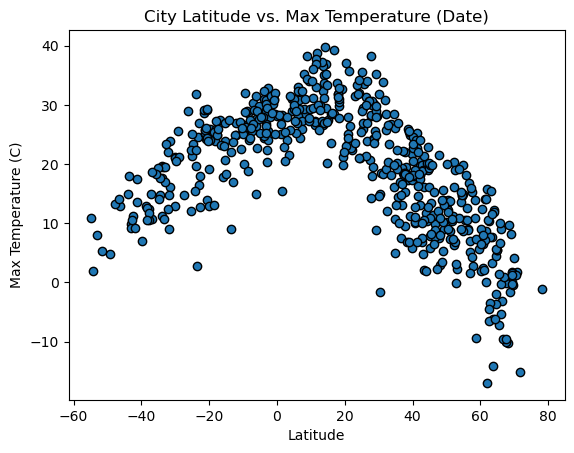

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# # Save the figure
plt.savefig("output_data/Fig1.png")

# # Show plot
plt.show()



#### Latitude Vs. Humidity

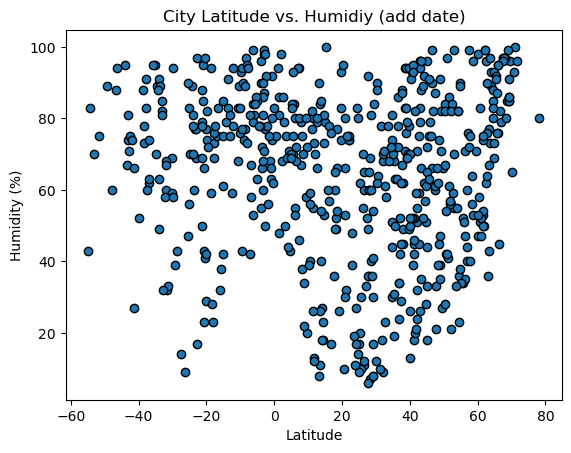

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
temp = city_data_df["Humidity"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Humidiy (add date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

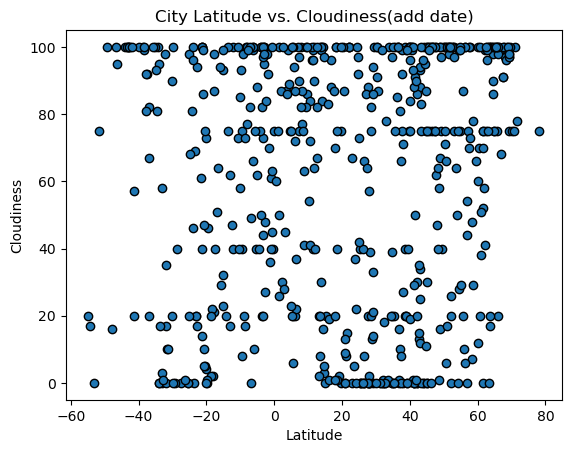

In [10]:
#Latitude vs. Cloudiness
lat = city_data_df["Lat"]
temp = city_data_df["Cloudiness"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(add date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

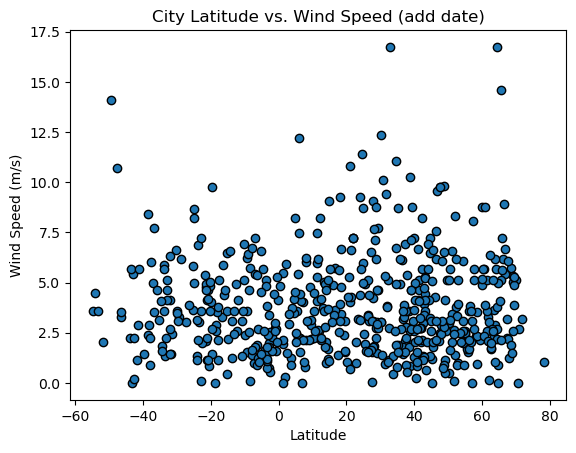

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
temp = city_data_df["Wind Speed"]
plt.scatter(lat, temp, edgecolor ='black')

# # Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (add date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Requires input of x_values and y_values as well as annotation location 
#(may need adjusted when data is rerun if data points obscure text)

def linear_regression(x_values, y_values, x_annotate, y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    text = plt.annotate(line_eq,(x_annotate, y_annotate),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    return

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-1.63,85,100,5.75,GL,1683563608
1,bethel,41.3712,-73.4140,22.72,45,0,5.14,US,1683563423
2,isafjordur,66.0755,-23.1240,9.02,76,20,6.17,IS,1683563609
3,olonkinbyen,70.9221,-8.7187,1.76,100,100,2.70,SJ,1683563610
4,dryden,49.7833,-92.7503,10.16,66,100,5.14,CA,1683563610


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
9,port mathurin,-19.6833,63.4167,26.00,74,0,9.77,MU,1683563611
12,cidreira,-30.1811,-50.2056,21.25,69,90,6.63,BR,1683563455
14,port-aux-francais,-49.3500,70.2167,4.78,89,100,14.10,TF,1683563613
15,papao,-17.7500,-149.5500,24.82,73,87,1.13,PF,1683563613
16,invercargill,-46.4000,168.3500,12.88,94,95,3.27,NZ,1683563394


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8282220265418664


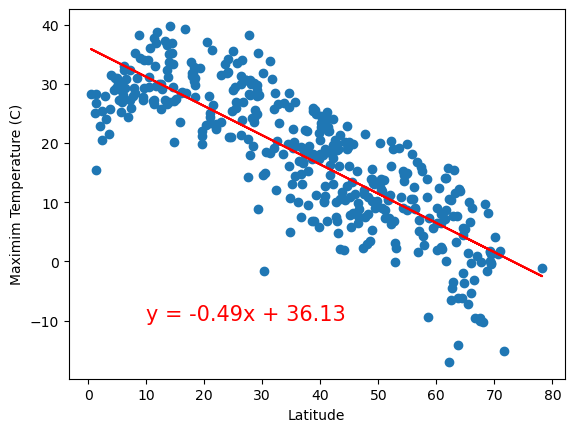

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_annotate = 10
y_annotate = -10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')


plt.show()

The r-value is 0.7781652309362953


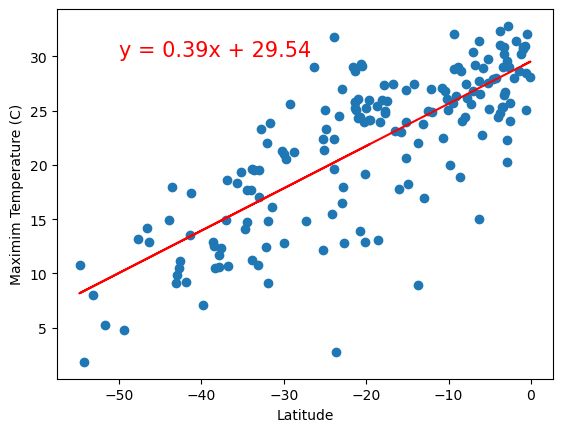

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Maximim Temperature (C)')
plt.show()

**Discussion about the linear relationship:** There is a clear correllation between temperature and proximity to the equator. In the chart describing the Northern Hemisphere, temperature decreases as distance from the equator and in the Southern Hemisphere, temperature increases as distance to the equator decreases. The high r-values of both plots suggest a strong correlation between latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.20822412118819303


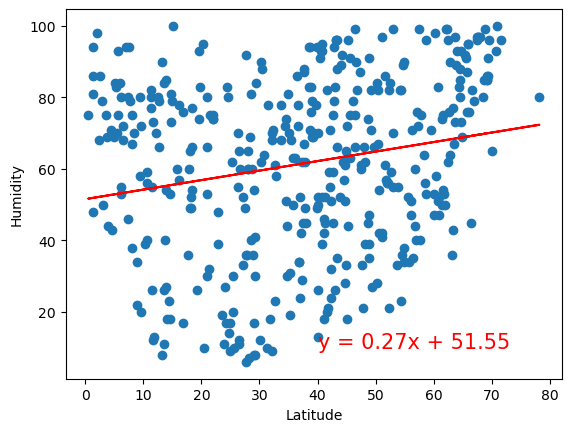

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_annotate = 40
y_annotate = 10


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is 0.13493157700593975


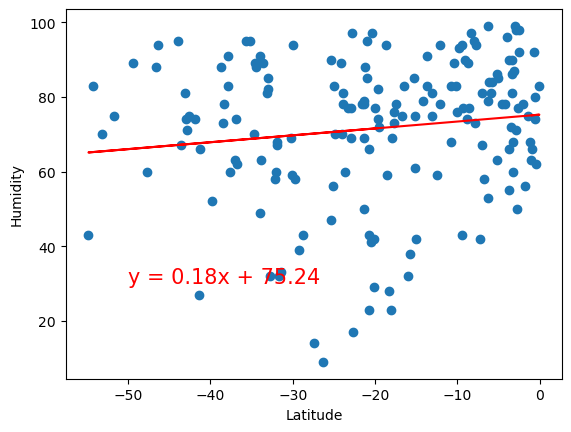

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_annotate = -50
y_annotate = 30


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The r-values of both the Northern and Southern Hemisphere are low, suggesting that there is not a strong relationship between humidity and latitude. Furthermore, since both charts display a positive correlation, they do not trend towards each other at the equator, but rather humidity increases slightly in the Norther Hemisphere as distance from the equator increases and humidity decreases as distance from the equator increases in the Southern Hemisphere. This could point to larger seasonal trends, so it would be useful to look at data from at least a year before drawing any conclusions regarding humidity vs. latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1517004639472248


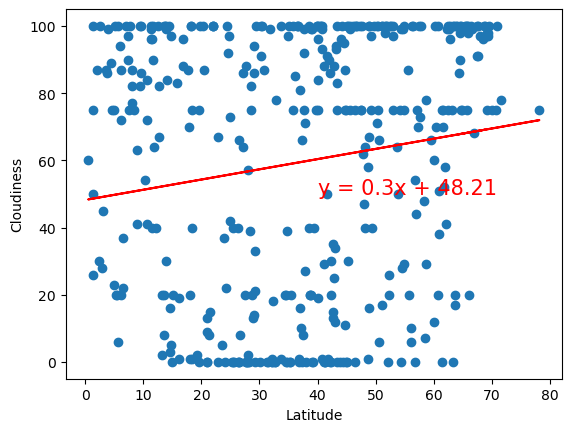

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_annotate = 40
y_annotate = 50


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is 0.07190835894857271


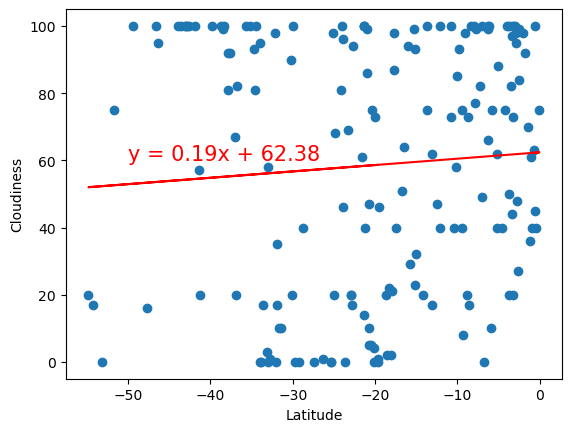

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_annotate = -50
y_annotate = 60


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The plots of Latitude vs. Cloudiness are similar to those examining Humidity, with a low r-value for both, indicating a very weak connection between the variables. Also, as with humidity, both plots show a positive correlation, indicating that there is not a strong relationship between proximity to the equator and cloudiness, but that cloudiness increases (slightly) as one moves north. Again, this may be tied to larger seasonal weather trends.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.007367953140963395


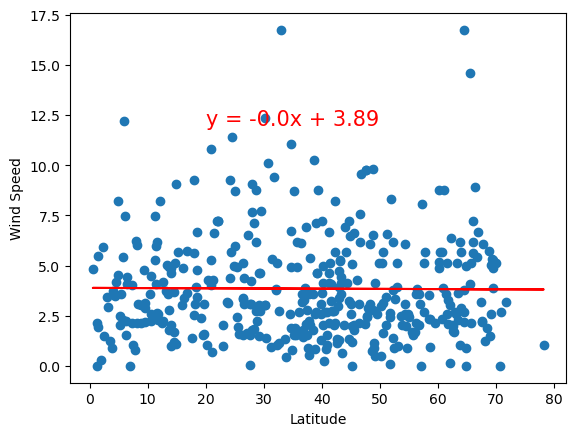

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_annotate = 20
y_annotate = 12


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is -0.2032799946656636


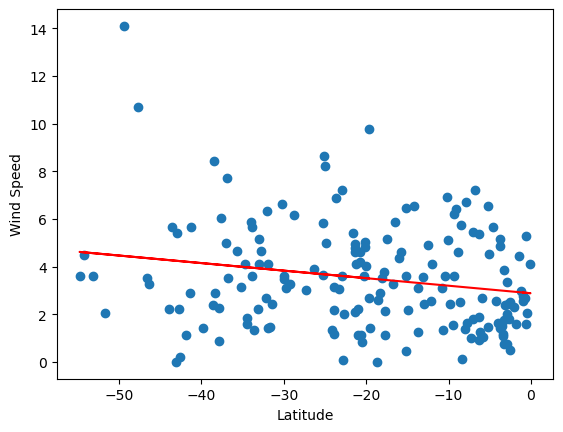

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_annotate = -30
y_annotate = 15


linear_regression(x_values, y_values, x_annotate, y_annotate)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** The 2 plots examining Wind Speed versus latitude have little in common. In the Norther Hemisphere, the r-value is almost 0, indicating that there is no relationship between the 2 variables. In the Southern Hemisphere, there is a small decrease in Wind Speed as distance to the equator decreases. With an r-value of .20, it is not enough of a relation to draw any conclusions from.

Overall, Temperature is the only one of the weather conditions examined that implies a strong relationship with Latitude. In both hemispheres, temperature increases as distance to the equator decreases.